# FIT5201: Assessment 1
## The Elements of Machine Learning

### Objectives
This assignment consists of three parts (A,B,C) that assess your understanding of model complexity, model selection, uncertainty in prediction with bootstrapping, and probabilistic machine learning. The total marks of this assessment is 100, and will contribute to the 20% of your final score. 

## Important Note
* You can complete your assignment using the codes shared in the unit as a base. However, <font color='red'>**you should make sure the codes you are borrowing are correct and relevant to the question**</font>.

* Please follow the structure of this template as much as you can.

* You can use the prepopulated codes cells or change them if you prefere. However, please do not change the name of the key variables, functions, and parameters eg `knn`, `num.fold`, `train.data`. It helps us to read and understand your submissiont more efficiently.

### Part A.  Model Complexity and Model Selection
In this part, you study the effect of model complexity on the training and testing errors.  You also demonstrate your programming skills by developing a regression algorithm and a cross-validation technique that will be used to select the models with the most effective complexity.

__Background__. A KNN regressor is similar to a KNN classifier (covered in Activity 1.1) in the sence that it finds the K nearest neighbors and estimates the label of the given test point based on the labels of its nearest neighbours. The main difference between KNN regression and KNN classification is that KNN classifier returns the label that has the majority vote in the neighborhood, whilst KNN regressor returns the average of the neighbors’ labels. 

#### Question 1 [KNN Regressor] 
Q1-1) Implement the KNN regressor function:
                                     `knn(train.data, train.label, test.data, K=3)` 
which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (`K`). It should return the regressed values for the test data points. When choosing the neighbors, you can use the Euclidean distance function to measure the distance between a pair of data points. 

__Hint__: You are allowed to use KNN classifier code from Activity 1 of Module 1.

Q1-2) Plot the training and the testing errors versus `1/K` for `K=1,..,20` in one plot, using the Task1A_train.csv and Task1A_test.csv datasets provided for this assignment. Discuss your findings.

Q1-3) Report the best value for K in terms of the testing error. Discuss the values of K corresponding to underfitting and overfitting based on your plot in Q1-2. 

#### Question 2 [K-fold Cross Validation] 
Q2-1) Implement a K-fold Cross Validation (CV) function for your KNN regressor:  
       `cv(train.data, train.label, numFold=10)` 
which takes the training data and their labels (continuous values), the number of folds, and returns RMSE for different folds of the training data. 

__Hint__: you are allowed to use bootstrap code from Activity 2 of Module 1.

Q2-2) Using the training data, run your K-fold CV where the `numFold` is set to 10. Change the value of `K=1,..,20` and for each K compute the average `10` RMSE values you have got.  Plot the average error numbers versus `1/K` for `K=1,..,20`. Further, add two dashed lines around the average error indicating the average +/- standard deviation of errors. Include the plot in your report. 

Q2-3) Report the values of K that results the minimum average RMSE and minimum standard deviation of RMSE based on your cross validation plot in Q2-2.  Discuss your findings.

# Initial EDA

In [1]:
#Load in Data for initial EDA
# Load the data
train.data <- read.csv("../Task1A_train.csv")
test.data <- read.csv("../Task1A_test.csv")

str(train.data)

'data.frame':	42 obs. of  2 variables:
 $ x1: num  1960 1960 1961 1962 1962 ...
 $ y : num  0.71 0.85 0.61 0.92 0.72 0.92 0.83 1 0.92 1.24 ...


In [2]:
str(test.data)

'data.frame':	42 obs. of  2 variables:
 $ x1: num  1960 1961 1961 1962 1962 ...
 $ y : num  0.63 0.44 0.69 0.55 0.77 0.6 0.8 0.77 1 1 ...


There is 2 columns, the dependent variable y and the single independent variable x1. 
With a single independent variable the euclidean distance between points will be linear. since eucldist^2 = (x1 - x2)^2 -> eucldist = |x1-x2|



In [3]:
dim(train.data)

[1] 42  2

In [4]:
dim(test.data)

[1] 42  2

42 rows in both the training and test set.

## Question 1 [KNN Regressor] 

We load the R libraries required.

In [5]:
library(ggplot2) # For plotting
library(reshape2) # For data wrangling
#...

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'reshape2' was built under R version 3.3.3"

### Q1-1 Implement the KNN regressor

We define a function to calculate the mean value of the K nearest neighbours based on a distance matrix. And a function to calculate the root mean square error (RMSE).

In [6]:
knn <- function(train.data, train.label, test.data, K=3){

    # Pre-allocate vector and matrices if needed (optional)
    #if(is.vector(train.data)){
    #    train.data <- matrix(train.data)
    #    train.label <- matrix(train.label)
    #    test.data <- matrix(test.data)
    #}
    #all.data <- rbind(test.data,train.data)
    mean.value <-vector()
    
    # eg. for the best performance, find the distance between any pair of test and train set...
     ## calculate distances between samples
    
    #if a train is a vector, vector specific operations are used
    if(is.vector(train.data)){
        train.len = length(train.data)
        test.len = length(test.data)
        all.data <- append(test.data,train.data)
    
    }
    else{
        train.len = dim(train.data)[1]
        test.len = dim(test.data)[1]
        all.data <- rbind(test.data,train.data)
    }

    #return(t(all.data))
    dist <- as.matrix(dist(all.data),method = 'euclidean')[1:test.len,((test.len+1):(test.len+train.len))]
    colnames(dist)<- 1:train.len #Rename colummns to be the index of the training set
    
    # For each test sample do:
    for (i in 1:test.len){
        
        # ...find its K nearest neighbours from training samples...
        
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        #... and calculate the mean value of the K nearest neighbors
        if(is.vector(train.label)){
            train.label <- matrix(train.label)
        }
        mean.value[i] <- sum(train.label[nn,])/K
    }
    
    # Return the mean value as output
    return (mean.value)
}


rmse <- function(real.value, estimated.value) {
  error <- estimated.value - real.value
  sqrderror <- error**2
  SSE <- sum(sqrderror) #Sum of Square Error 
  MSE <- SSE/length(real.value) #Mean Square Error (also known as Variance)
  RMSE <- MSE**0.5 #Square Roor of Mean Square Error
  return (RMSE)
}

### Q1-2 Plot training and testing errors v.s. 1/K

We load the data, then separate the predictors (train.data and test.data) from the target values (train.value and test.value) for input to the knn regressor function.

In [7]:
# Split dependent and independent attributes
train.label <- train.data[2] #Dependent variable
train.data <- train.data[1] #Independent variable

test.label <- test.data[2]
test.data <- test.data[1]

# set random seed
set.seed(1234)

In [8]:
#test knn
knn(train.data,train.label,test.data,K=3)

[1]  0.7233333  0.7233333  0.7933333  0.7500000  0.8533333  0.8233333
 [7]  0.9166667  0.9166667  1.0533333  1.1066667  1.2833333  1.2900000
[13]  1.5233333  1.5500000  1.7400000  1.6300000  1.9000000  2.0100000
[19]  2.4000000  2.5500000  3.0600000  3.3600000  3.8700000  4.2600000
[25]  4.7400000  5.1600000  5.7300000  6.0600000  6.5100000  6.6300000
[31]  7.2300000  7.5000000  7.9500000  8.5200000  9.1200000 10.3200000
[37] 11.1900000 12.6900000 13.6800000 15.0300000 15.6900000 15.6900000

In [9]:
#test rmse
rmse(knn(train.data,train.label,test.data,K=3),test.label)

[1] 1.301972

We calculate the train and test RMSE's for K in 1:20.

In [10]:
# Initiate a dataframe to record RMSE
rmse.df <- data.frame('K'=1:20, 'TrainRMSE'=0, 'TestRMSE'=0)


# calculating rmse... 
for (k in 1:20) {
    
    # training rmse
    rmse.df[k, 'TrainRMSE'] = rmse(knn(train.data,train.label,test.data,K=k),train.label)
    
    
    # testing rmse
    rmse.df[k, 'TestRMSE'] = rmse(knn(train.data,train.label,test.data,K=k),test.label)
        
}

In [11]:
rmse.df

K,TrainRMSE,TestRMSE
1,0.0000000,1.2998938
2,0.3498120,1.4583110
3,0.3103885,1.3019715
4,0.4092240,1.3611987
5,0.3977682,1.1748214
6,0.5742264,1.2136546
7,0.6645726,1.0388807
8,0.8530190,1.0847818
9,0.9474979,0.9770276
10,1.1328322,1.0227636


We plot the training and testing errors.

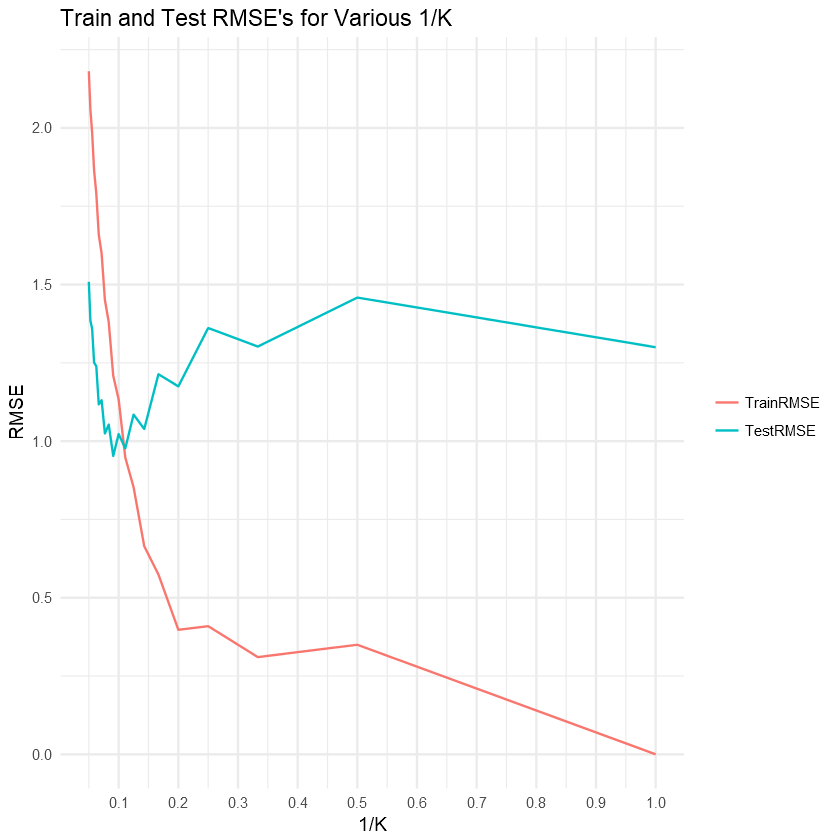

In [12]:
#Reshape
rmse.df <- melt(rmse.df, id='K') # reshape for visualization
names(rmse.df) <- c('K', 'type', 'RMSE')

# Plot
ggplot(data=rmse.df, aes(x=1/K, y=RMSE, color=type)) + geom_line() +
       scale_color_discrete(guide=guide_legend(title=NULL)) +
       theme_minimal() +
       scale_x_continuous(breaks=seq(0, 1, 0.1)) +
       ggtitle("Train and Test RMSE's for Various 1/K")

** Diagram 1-1: Train & Test Error for various 1/K Values **

### Q1-3 Report the best K

We see that as K increases (Moving from Right to Left on the Graph above) the complexity of the model decreases, as more values of the training data are used in the final prediction for each row in the test set. 

It can be seen that the training error decreases with increasing complexity to the **best RMSE of 0 at a K value of 1 (1/K = 1)**. The decision boundary would be flexible enough to collect only the datapoint that is used in validation and such will result in 0% error. As more values are selected, more noise is added and the training error increases.

However test error only increases until K = 2 and then with drops with reducing complexity to **the best RMSE of 0.953 (3sf) at a K value of 11 (1/K = 0.091 3sf)** . Unlike the training error, the decision boundary is flexible enough to collect the **best** points and reduces the addition of noise from additional datapoints.

It is noted that too much complexity when the K is above a value of 11 (right side of the chart), causes the model to overfit the training data and too little complexity when K is below a value of 11 (left side of chart) causes the model to underfit the training data. While this is the general trend, it can be seen in the above graph that similar K values can still result in a wide variety of results. This is examined further in Question 2.

## Question 2 [K-fold Cross Validation]

### Q2-1 Implement a K-fold cross validation

We define a function to segment a dataset into a given number of folds for K-fold cross validation to determine the most suitable value for the number of nearest neighbours K considering all the folds.

In [13]:
cv <- function (train.data, train.label, num.fold=10, K=3){
    # Initiate a dataframe to record RMSE
    rmse.df <- data.frame('K'=rep(0,K), 'L'=rep(0,num.fold), 'RMSE'=rep(0, num.fold * K))
    
    #Find the length of the training set
    train.length = dim(train.data)[1]
    dev.size = floor(train.length / num.fold) # number of samples reserved for validation
    dev.totalsize = dev.size*num.fold
    # notice that since the sample size may not be a multiple of 10!
    print(paste(dev.totalsize,'of the',train.length,'data points used in cross-validation',sep = ' '))
    
    #Create a subset of all training values to use in the Kfolds validation
    set.seed(1234)
    dev.allindices = sample(1:train.length,dev.totalsize)

    for (l in 1:num.fold) {
        
        dev.indices = dev.allindices[(l*dev.size-3):(l*dev.size)] #Select the validation indices for this fold
        train.indices = setdiff(1:train.length,dev.indices) #Select all other training indices for training
        

        
        # for each value of k...
       for (k in 1:K) {
            index = ((k-1)*num.fold+l)
            rmse.df[index,1] = k
            rmse.df[index,2] = l
           

           
            rmse.df[((k-1)*num.fold+l),3] = rmse(knn(train.data[train.indices,],train.label[train.indices,],train.data[dev.indices,],K=k), train.label[dev.indices,])
        }
    
    }
   return(rmse.df)
}

In [14]:
#test cv
cv(train.data,train.label,num.fold = 10,K = 3)

[1] "40 of the 42 data points used in cross-validation"


K,L,RMSE
1,1,0.5655307
1,2,0.3716517
1,3,0.3400735
1,4,0.9353074
1,5,0.1507481
1,6,1.0580879
1,7,0.6386901
1,8,0.3412111
1,9,1.2510196
1,10,0.7101232


In [15]:
K <- 20 # maximum number of nearest neighbours
L <- 10 # number of folds in cross validation
cv.results <- cv(train.data,train.label,num.fold = L,K=K)

K.results <- data.frame('K'=rep(0,K),'mean'=rep(0,K),'sd'=rep(0,K))
for (k in 1:K){
    k_ind = ((k-1)*L+1):(k*L) #relevant indices
    meank = mean(cv.results[k_ind,3])
    sdk = sd(cv.results[k_ind,3])
    K.results[k,1] = k
    K.results[k,2] = meank
    K.results[k,3] = sdk
    
}

[1] "40 of the 42 data points used in cross-validation"


In [16]:
K.results

K,mean,sd
1,0.6362443,0.3553217
2,0.4678830,0.1511685
3,0.4798617,0.2058615
4,0.4574927,0.2580051
5,0.5293910,0.3607482
6,0.6405132,0.4934382
7,0.7754134,0.5814189
8,0.8836652,0.7037098
9,0.9806939,0.8160032
10,1.0951783,0.8821440


### Q2-2 Plot RMSE v.s. 1/K

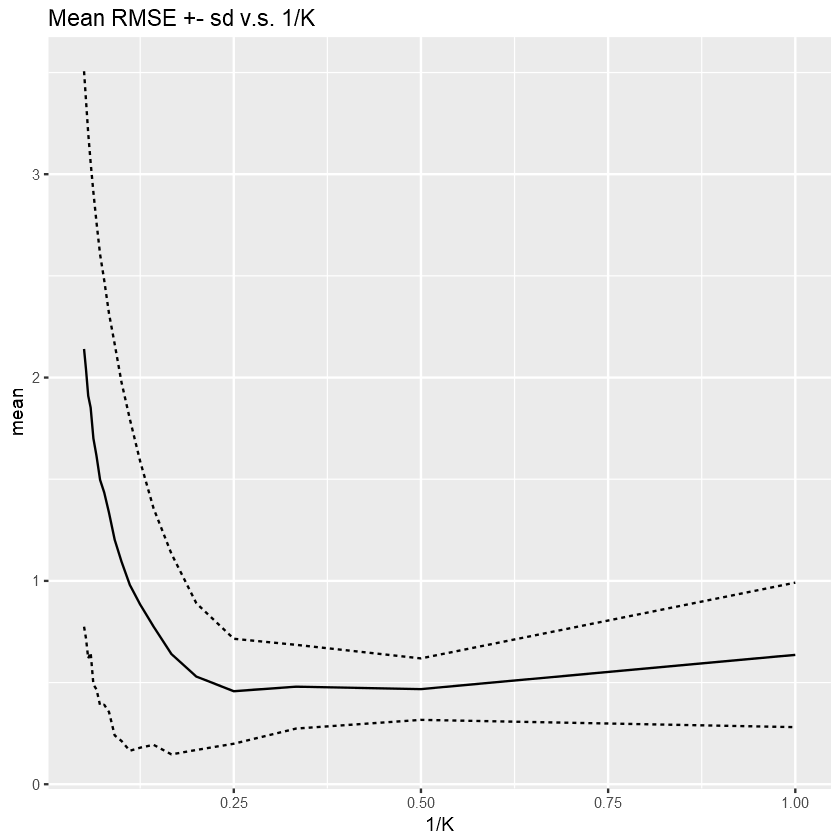

In [17]:
# Plot the RMSE vs 1/K

ggplot(data=K.results, aes(x=1/K, y=mean)) + geom_line() +
       geom_line(data = K.results, aes(x=1/K, y=mean+sd), linetype="dashed") +
       geom_line(data = K.results, aes(x=1/K, y=mean-sd), linetype="dashed") +
       ggtitle("Mean RMSE +- sd v.s. 1/K")

**Diagram 2-1: Mean fold error from 10-fold Cross Validation on K nearest Neighbours**

### Q2-3 Report the best K

The trend of the above curve shows that the best value for K is at K of 4 (1/K = 0.25) It can be seen that at lower levels of complexity (left side of graph) the mean error is higher and the variance is also very high. As the K decreases, the variance decreaseses while the RMSE decreases to a optimal value at approximately K=4, the error then increases as complexity increases. Notably the variance is large at both low and high complexities since the choice of values used in validation would have a significant effect on the error in both cases (since only 4 were used for each fold) 

### Part B. Prediction Uncertainty with Bootstrapping
This part is the adaptation of Activity 2 from KNN classification to KNN regression. You use the bootstrapping technique to quantify the uncertainty of predictions for the KNN regressor that you implemented in Part A. 

#### Question 3 [Bootstrapping]
Q3-1) Modify the code in Activity 2 to handle bootstrapping for KNN regression. 

Q3-2) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Apply your bootstrapping for KNN regression with `times = 100` (the number of subsets), `size = 25` (the size of each subset), and change `K=1,..,20` (the neighbourhood size). Now create a boxplot where the x-axis is `K`, and the y-axis is the average error (and the uncertainty around it) corresponding to each K.  

Q3-3) Based on your plot in Q3-2, how does the test error and its uncertainty behave as `K` increases? 

Q3-4) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Apply your bootstrapping for KNN regression with `K=5` (the neighbourhood size), `size = 25` (the size of each subset), and change `times = 10, 20, 30,.., 200` (the number of subsets). Now create a boxplot where the x-axis is `times`, and the y-axis is the average error (and the uncertainty around it) corresponding to each value of `times`.  

Q3-5) Based on your plot in Q3-4, how does the test error and its uncertainty behave as the number of subsets in bootstrapping increases? 

## Question 3 [Bootstrapping] 

### Q3-1 Implement KNN regression with bootstrapping

We define a function that randomly sample row indices with replacement from a given dataset.

In [18]:
boot <- function (original.size=920, sample.size=25, times=100){
    
    indx <- matrix(nrow=times,ncol=sample.size)
    for (t in 1:times){
        
        indx[t, ] <- sample(original.size,sample.size,replace = TRUE)
        
    }
    
    
    
    return(indx) 
}

In [19]:
#Test bootstrap function
#boot(920,25,100)

We load the data, then separate the predictors from the target values for input to the knn regressor function.

In [20]:
# Load the datasets
train.data <- read.csv("../Task1B_train.csv")
test.data <- read.csv("../Task1B_test.csv")

str(train.data)
str(test.data)

'data.frame':	930 obs. of  5 variables:
 $ x1: num  1991 1992 1992 1992 1992 ...
 $ x2: num  1629 1607 1618 1631 1635 ...
 $ x3: num  1678 1679 1687 1683 1698 ...
 $ x4: num  1773 1718 1723 1734 1754 ...
 $ y : num  2444 2448 2485 2488 2510 ...
'data.frame':	930 obs. of  5 variables:
 $ x1: num  1992 1992 1992 1992 1992 ...
 $ x2: num  1614 1621 1611 1640 1646 ...
 $ x3: num  1688 1684 1672 1704 1716 ...
 $ x4: num  1750 1708 1714 1757 1754 ...
 $ y : num  2460 2470 2467 2508 2497 ...


In [21]:

# Split dependent and independent attributes
train.label <- train.data[,5]
train.data <- train.data[,1:4]

test.label <- test.data[,5]
test.data <- test.data[,1:4]

test.len = dim(test.data)[1]
train.len = dim(train.label)[1]

# set random seed
set.seed(1234)

In [22]:
#test knn
#knn(train.data,matrix(train.label),test.data,K=3)

In [23]:
#test rmse
rmse(knn(train.data,train.label,test.data,K=3),test.label)

[1] 53.92292

Now we perform the bootstrapping

**Q3-2) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Apply your bootstrapping for KNN regression with `times = 100` (the number of subsets), `size = 25` (the size of each subset), and change `K=1,..,20` (the neighbourhood size). Now create a boxplot where the x-axis is `K`, and the y-axis is the average error (and the uncertainty around it) corresponding to each K. ** 

In [24]:
K <- 20#20             # Maximum K for KNN
L <- 100#100            # Number of bootstrapped samples
N <- 25#25             # Size of bootstrapped samples

# generate bootstrap indices:
boot.indx <- boot(dim(train.data)[1], N, L)


# a dataframe to track the number of missclassified samples in each case
error <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE (More like 10minutes on my laptop)
## for every k values:
for (k in 1:K ){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        error[i,'K'] <- k
        error[i,'L'] <- l
        #### calculate and record the train and test error rates
        #return(knn(train.data[indx,],train.label[indx],test.data))
        error[i,'test'] <- rmse(knn(train.data[indx,],train.label[indx],test.data,K=k),test.label)
    } 
}


In [25]:
error

K,L,test
1,1,217.1287
1,2,152.7032
1,3,286.1548
1,4,192.3379
1,5,146.3349
1,6,179.5733
1,7,167.2557
1,8,143.5429
1,9,151.6425
1,10,227.6028


### Q3-2 Plot bootstrapping KNN regression for different number of nearest neighbours

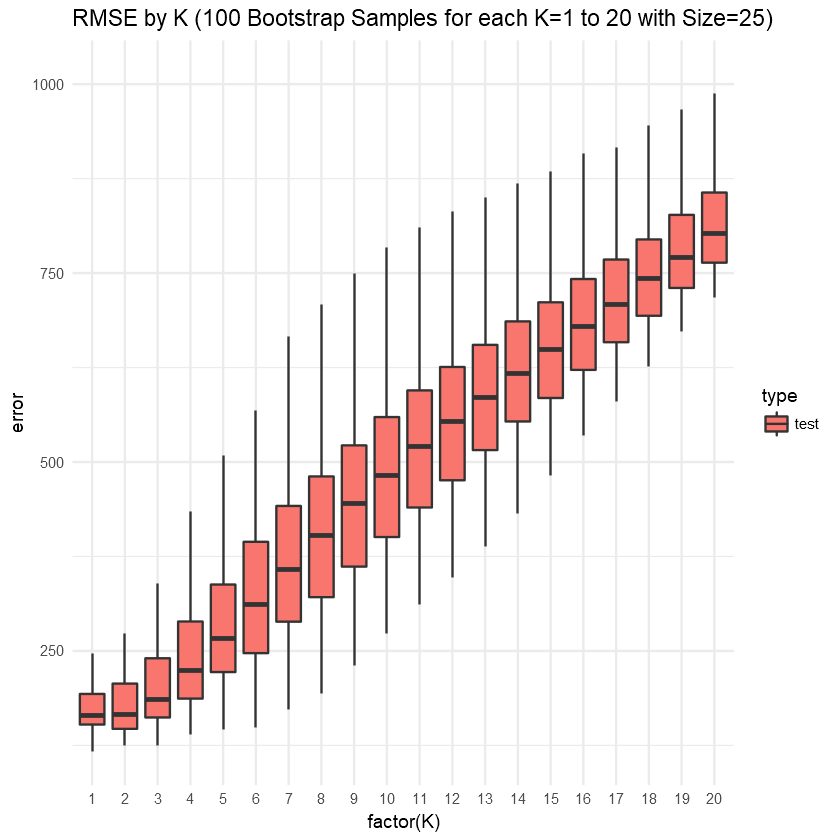

In [28]:
# Apply bootstrapping for KNN regression with 100 bootstrapped datasets, 
# each having 25 samples, and maximum number of neighbours 20
error.m <- melt(error, id=c('K', 'L')) # reshape for visualization
names(error.m) <- c('K', 'L', 'type', 'error')

ggplot(data=error.m[error.m$type=='test',], aes(factor(K), error,fill=type)) + 
    geom_boxplot(outlier.shape = NA) + 
    scale_color_discrete(guide = guide_legend(title = NULL)) +
    theme_minimal() +
    ggtitle('RMSE by K (100 Bootstrap Samples for each K=1 to 20 with Size=25)')



### Q3-3 Results interpretation

By the boxplot it can be seen that the increase in K value causes an increase in the test error of the bootstrapped datasets. The variability tends to increase as more K values are used since the decision tree is less flixible and produces a decision tree that can not adjust as easily to the large test set. It can be seen here that when a small training set is used in comparision to the test set it is easier to underfit.

### Q3-4 Plot bootstrapping KNN regression for different number of bootstrapped datasets

Q3-4) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Apply your bootstrapping for KNN regression with `K=5` (the neighbourhood size), `size = 25` (the size of each subset), and change `times = 10, 20, 30,.., 200` (the number of subsets). Now create a boxplot where the x-axis is `times`, and the y-axis is the average error (and the uncertainty around it) corresponding to each value of `times`.  


In [54]:
K <- 5                # k nearest neighbours
N <- 25                # Size of bootstrapped samples
max.sample.size = 200  # Maximum size of sampling
Z = floor(max.sample.size/10)
 
rmse_sample.df <- data.frame('Times'=(1:Z)*10, 'N'=1:N,'test'= rep(0,N*Z))


for (z in 1:Z){
    boot.indx <- boot(dim(train.data)[1], z*10,N)
    
        for (n in 1:N){
            indx <- boot.indx[n,]
            rmse_sample.df[(z-1)*N+n,1] <- z*10
            rmse_sample.df[(z-1)*N+n,2] <- n
            rmse_sample.df[(z-1)*N+n,3] <- rmse(knn(train.data[indx,],train.label[indx],test.data,K=K),test.label)
        }
     
        
} 

In [55]:
rmse_sample.m <- melt(rmse_sample.df, id=c('Times', 'N')) # reshape for visualization
names(rmse_sample.m) <- c('Times', 'N', 'type', 'RMSE')

rmse_sample.m[rmse_sample.m$type=='test',]

Times,N,type,RMSE
10,1,test,408.5911
10,2,test,698.6735
10,3,test,630.5314
10,4,test,863.7857
10,5,test,566.8169
10,6,test,795.4325
10,7,test,644.3018
10,8,test,936.7149
10,9,test,600.5550
10,10,test,657.3540


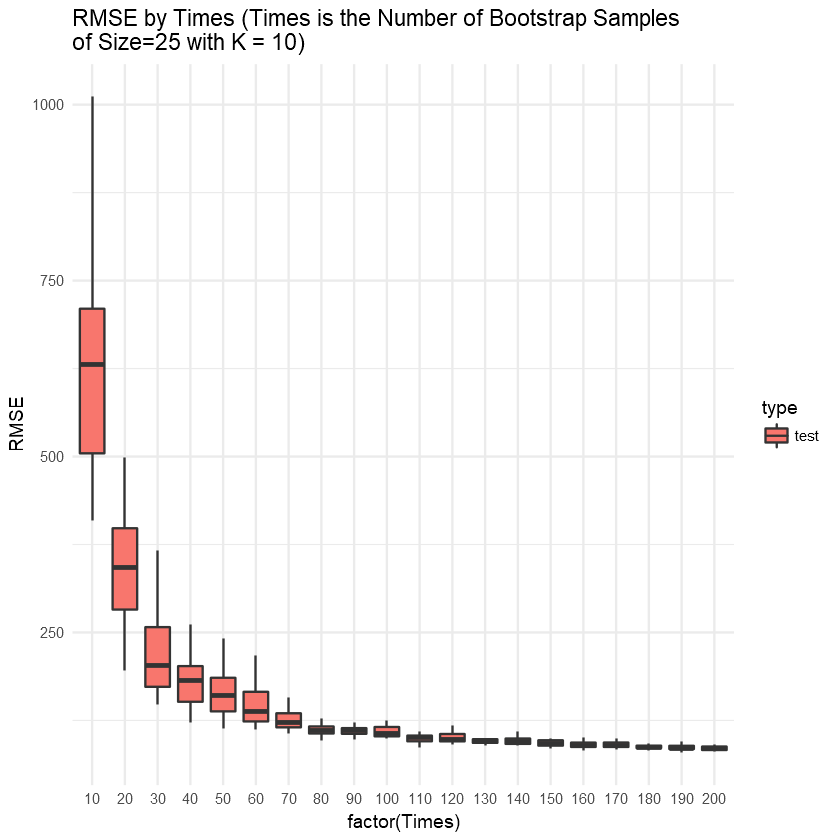

In [56]:
ggplot(data=rmse_sample.m[rmse_sample.m$type=='test',], aes(factor(Times), RMSE,fill=type)) + 
    geom_boxplot(outlier.shape = NA) + 
    scale_color_discrete(guide = guide_legend(title = NULL)) +
    theme_minimal() +
    ggtitle('RMSE by Times (Times is the Number of Bootstrap Samples\nof Size=25 with K = 10)')

### Q3-3 Results interpretation

We see here that as the number of Times a boostrapped sample is taken from the dataset, the models average RMSE and variability in RMSE reduces significantly. As theh number of times a bootstrap sample increases, there is increasing confidence of the error that can be expected from a model developed from the training dataset for this size of neightbourhood.

### Part C. Probabilistic Machine Learning
In this part, you show your knowledge about the foundation of the probabilistic machine learning (i.e. probabilistic inference and modeling) by solving one simple but basic statistical inference problems. Solve the following problem based on the probability concepts you have learned in Module 1 with the same math conventions. Please show your work in your report. Also, there are two conceptual questions.

#### Question 4 [Bayes Rule] 
Recall the simple example from Appendix A of Module 1. Suppose we have one red and one blue box. In the red box we have 2 apples and 6 oranges, whilst in the blue box we have 3 apples and 1 orange. Now suppose we randomly selected one of the boxes and picked a fruit. If the picked fruit is an apple, what is the probability that it was picked from the blue box?

Note that the chance of picking the red box is 40% and the selection chance for any of the pieces from a box is equal for all the pieces in that box.

## Question 4 [Bayes Rule] 

In [57]:
p_red = 0.40 #Given probability of selecting red box
p_blue = 1- p_red #Complementary events add to a probability of 1

# Number of Apples and Oranges
n_red_apples = 2
n_red_oranges = 6
n_blue_apples = 3
n_blue_oranges = 1

# Number in each box
n_red = n_red_apples + n_red_oranges
n_blue = n_blue_apples + n_blue_oranges

# Probability of Intersections
p_apple_given_blue = n_blue_apples/n_blue #P(A|B) = n(BA)/n(B) Conditional Probability Rules
p_apple_given_red = n_red_apples/n_red #P(A|B) = n(BA)/n(B)

#Probability of Apple being drawn
p_apple = p_apple_given_blue*p_blue + p_apple_given_red * p_red #Law of Total Probability

#Probability of Blue given Apple
p_blue_given_apple = p_apple_given_blue * p_blue/p_apple #Bayes Rule P(B|A) = P(A|B)*P(B)/P(A)

p_blue_given_apple

[1] 0.8181818

In the above solution it can be seen that the probability that the blue box was used to select a apple was approximately 81.8% 2sf. 